In [57]:
import pandas as pd
import yfinance as yf
import statsmodels.tsa.stattools as smt
import datetime
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import read_csv
from sklearn.linear_model import LinearRegression
import math

In [124]:
import pandas as pd
import yfinance as yf
import statsmodels.tsa.stattools as smt
import datetime
from statsmodels.tsa.stattools import adfuller
import numpy as np


start = datetime.datetime(2022, 1, 1) # YYYY-MM-DD
# start += datetime.timedelta(hours=22, minutes=0)
end = datetime.datetime(2023, 3, 27)

# Get the data for Bitcoin and Ethereum
btc = yf.Ticker("XMR-USD").history(start=start, end=end, interval='1h')
eth = yf.Ticker("LTC-USD").history(start=start, end=end, interval='1h')

#FLOW/THETA, AR/DOT, ATOM/BNB

In [125]:
#оценка параметра theta OU

def OU_theta_estimation(df, delta_t=0.6):


    S=np.asarray(df)
    # Calculate the differences between adjacent values of S
    dS = np.diff(S)

    # Create a matrix X with one column containing the previous value of S
    X = S[:-1].reshape(-1, 1)

    # Create a vector y containing the differences between adjacent values of S
    y = dS.reshape(-1, 1)

    # Fit a linear regression model to the data
    reg = LinearRegression().fit(X, y)

    # Print the estimated value of θ
    theta = -reg.coef_[0][0]/delta_t
    return theta

In [126]:
def model_11(x,y):
    # define the design matrix X and response variable y
    X = np.array(x)
    y = np.array(y)

    # calculate the least squares estimates for beta
    XtX = X.T @ X
    Xty = X.T @ y
    beta_hat = np.linalg.solve(XtX, Xty)
    
    return beta_hat

In [127]:
# функция для проверки стационарности временного ряда
def is_stationary(timeseries,pval):
    adf_test = adfuller(timeseries)
    p_value = adf_test[1]
    if p_value < pval:
        return True
    else:
        return False

In [128]:
# Create a dataframe with the closing price of each cryptocurrency
data = pd.concat([btc['Close'], eth['Close']], axis=1)
data.columns = ['X', 'Y']
# Remove missing values
data.dropna(inplace=True)

# Remove infinite values
data = data[~np.isinf(data).any(axis=1)]

Параметры модели аппроксимации спреда, модель 1: [  0.58688276 -14.72031932]
-----------------------------
Параметры модели аппроксимации спреда, модель 2: [ 0.79309037 99.44712348]
-----------------------------
Спред1 стационарный 90%:  False
Спред1 стационарный 95%:  False
Спред1 стационарный 99%:  False
-----------------------------
Спред2 стационарный 90%:  True
Спред2 стационарный 95%:  False
Спред2 стационарный 99%:  False
График Z


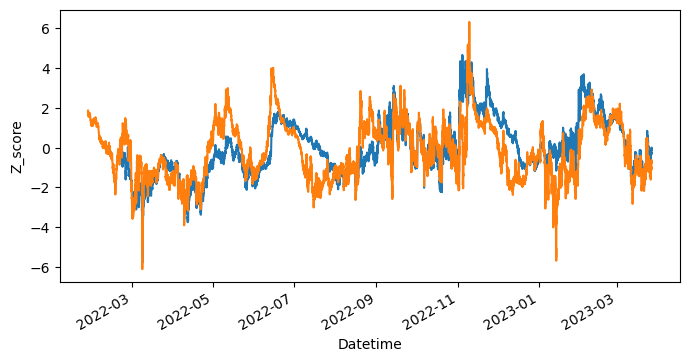

-----------------------------


In [129]:
delta_t = 0.5
# параметры модели model_1[0] и model_1[1] - аппроксимация спреда
x_1 = [[i, 1] for i in data.X.tolist()]
y_1 = data.Y.tolist()

model_1 = model_11(x_1,y_1)
if True:
    print('Параметры модели аппроксимации спреда, модель 1:', model_1)

    print('-----------------------------')
        
# параметры модели model_1[0] и model_1[1] - аппроксимация спреда
x_2 = [[i, 1] for i in data.Y.tolist()]
y_2 = data.X.tolist()

model_2 = model_11(x_2,y_2)
if True:
    print('Параметры модели аппроксимации спреда, модель 2:', model_2)

    print('-----------------------------')
    
#Заполняем спред и рисуем его 
data['spread_1'] = data.Y - model_1[0]*data.X - model_1[1]
N1 = 2/OU_theta_estimation(data.spread_1, delta_t=delta_t) - 1
ma1 = data.spread_1.rolling(window=int(N1)).mean()
std1 = data.spread_1.rolling(window=int(N1)).std()
data['z1'] = (data.spread_1 - ma1)/std1
print('Спред1 стационарный 90%: ',is_stationary(data.spread_1,0.1))
print('Спред1 стационарный 95%: ',is_stationary(data.spread_1,0.05))
print('Спред1 стационарный 99%: ',is_stationary(data.spread_1,0.01))
print('-----------------------------')
data['spread_1'] = (data.spread_1 - data.spread_1.mean())/data.spread_1.std()

data['spread_2'] = data.X - model_2[0]*data.Y - model_2[1]
N2 = 2/OU_theta_estimation(data.spread_2, delta_t=delta_t) - 1 
ma2 = data.spread_2.rolling(window=int(N2)).mean()
std2 = data.spread_2.rolling(window=int(N2)).std()
data['z2'] = (data.spread_2 - ma2)/std2
data['z2'] = data['z2']*-1
print('Спред2 стационарный 90%: ',is_stationary(data.spread_2,0.1))
print('Спред2 стационарный 95%: ',is_stationary(data.spread_2,0.05))
print('Спред2 стационарный 99%: ',is_stationary(data.spread_2,0.01))
data['spread_2'] = (data.spread_2 - data.spread_2.mean())/data.spread_2.std()
data['spread_2'] = data.spread_2*-1
  

if True:
#     print('График Z')
#     data.spread_1.plot(figsize=(8,4))
#     data.spread_2.plot(figsize=(8,4))
#     plt.ylabel("Z_score")
#     plt.show()
    
    print('График Z')
    data.z1.plot(figsize=(8,4))
    data.z2.plot(figsize=(8,4))
    plt.ylabel("Z_score")
    plt.show()
    
print('-----------------------------')

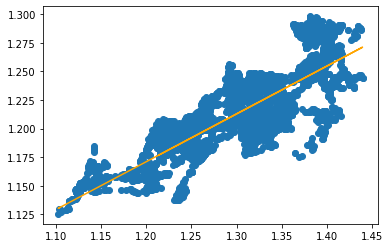

In [368]:
plt.scatter(data.X.tolist(),data.Y.tolist())
plt.plot(data.X, model_1[0]*data.X + model_1[1], color='Orange') 

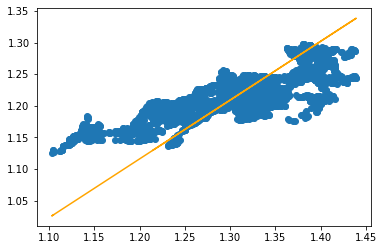

In [369]:
plt.scatter(data.X.tolist(),data.Y.tolist())
plt.plot(data.X, results.params[0]*data.X, color='Orange') 

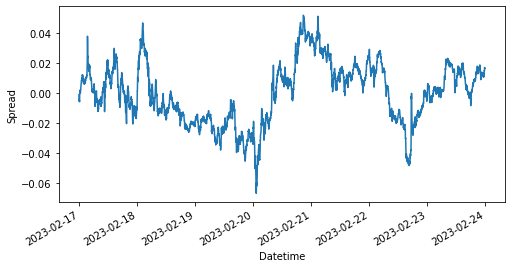

In [370]:
#Spread
data['spread'] = data.Y - model_1[0]*data.X - model_1[1]
# data['spread'] = data.Y - results.params[0]*data.X

# Plot the spread
data.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

(array([ 0.24412601,  1.17412988,  3.38288905, 10.10216697, 16.78656974,
        15.43806414, 19.83233239, 10.57879395,  5.03364591,  1.44150599]),
 array([-0.06689786, -0.05499511, -0.04309237, -0.03118962, -0.01928687,
        -0.00738413,  0.00451862,  0.01642137,  0.02832411,  0.04022686,
         0.05212961]),
 <BarContainer object of 10 artists>)

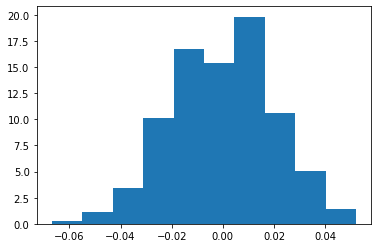

In [371]:
plt.hist(data.spread, density=True)

(array([0.0048981 , 0.02355752, 0.06787365, 0.20268797, 0.33680257,
        0.30974641, 0.39791218, 0.21225093, 0.10099412, 0.0289221 ]),
 array([-3.33425469, -2.74101016, -2.14776564, -1.55452111, -0.96127659,
        -0.36803206,  0.22521246,  0.81845698,  1.41170151,  2.00494603,
         2.59819056]),
 <BarContainer object of 10 artists>)

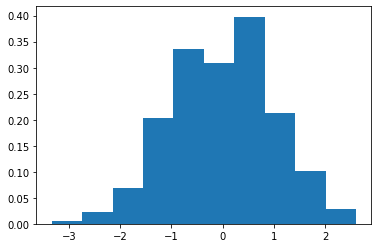

In [372]:
plt.hist((data.spread-data.spread.mean())/data.spread.std(), density=True)

In [373]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(data.spread, maxlag = 1)
adf[0]

-2.6863961142707504

In [374]:
adf[4]

{'1%': -3.4312554152032506,
 '5%': -2.861940122738796,
 '10%': -2.566982981147256}

In [375]:
#Johansen test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Соединяем ряды вместе в матрицу данных
data_j = np.column_stack([data.X.tolist(), data.Y.tolist()])

# Оцениваем коэффициенты ковариации и проверяем стационарность временных рядов
johansen_results = coint_johansen(data_j, det_order=0, k_ar_diff=1)


# Выводим значения статистик теста и критические значения
print("Trace statistic:")
print(johansen_results.trace_stat)
print("\nTrace critical values:")
print(johansen_results.trace_stat_crit_vals)
# 1й столбец - критические значения для 1%
# 2й столбец - для 5%
# 3й столбец - для 10%

print("\nMaximum eigenvalue statistic:")
print(johansen_results.max_eig_stat)
print("\nMaximum eigenvalue critical values:")
print(johansen_results.max_eig_stat_crit_vals)

Trace statistic:
[14.21110023  6.63855774]

Trace critical values:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum eigenvalue statistic:
[7.57254249 6.63855774]

Maximum eigenvalue critical values:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


Матрица "Trace critical values" содержит критические значения для статистики "Trace statistic". Каждый столбец матрицы соответствует уровню значимости (1%, 5% и 10%), а каждая строка соответствует количеству коинтегрирующих векторов (от 1 до 3).

Матрица "Maximum eigenvalue critical values" содержит критические значения для статистики "Maximum eigenvalue statistic". Каждый столбец матрицы соответствует уровню значимости (1%, 5% и 10%), а каждая строка соответствует количеству коинтегрирующих векторов (от 1 до 3).

Результаты вашего теста Йохансена на коинтеграцию выводят значения статистик теста и соответствующие им критические значения. В данном случае, вы используете две статистики: следа (trace statistic) и максимальное собственное значение (maximum eigenvalue statistic). Каждая статистика имеет свое критическое значение для разных уровней значимости.

Значение статистики теста указывает на то, насколько сильно временные ряды коинтегрированы. Если значение статистики больше критического значения для заданного уровня значимости, то нулевая гипотеза о наличии коинтеграции отвергается в пользу альтернативной гипотезы о наличии коинтеграции.

В вашем случае, для следа статистика равна 44.040, что превышает критическое значение 35.4628 для уровня значимости 1%. Это означает, что нулевая гипотеза о отсутствии коинтеграции между рядами отвергается на уровне значимости 1%, то есть можно утверждать, что ряды коинтегрированы.

Для максимального собственного значения статистика равна 23.283, что также превышает критическое значение 18.520 для уровня значимости 1%. Это также говорит о наличии коинтеграции между рядами.

В целом, результаты теста Йохансена позволяют сделать вывод о том, что ряды являются коинтегрированными.

In [376]:
#The null hypothesis is that the two time series are not cointegrated

import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as ts

# Calculate the spread and perform the augmented Dickey-Fuller test
def cointegration_test(data, alpha=0.05):
    spread = data["Y"] - data["X"]*model_1[0] - model_1[1]
#     spread = data["Y"] - data["X"]*results.params[0]
    result = ts.adfuller(spread, maxlag=1, autolag="AIC", regression="c")
    p_value = result[1]
    if p_value > alpha:
        print("Failed to reject the null hypothesis, p-value:", p_value)
    else:
        print("Rejected the null hypothesis, p-value:", p_value)
    
    print((1-p_value)*100, '%')

cointegration_test(data)

Failed to reject the null hypothesis, p-value: 0.07642206399992693
92.35779360000731 %


In [377]:
mean = data['spread'].values.mean()
print(mean)

3.342805177230304e-17


In [378]:
std = data['spread'].values.std()
print(std)

0.020062423443620525


In [385]:
# z = []
# for i in range(len(data.spread)):
#     z.append((data.spread.tolist()[i] - mean) / std)

In [386]:
# plt.plot(z)

<AxesSubplot:xlabel='Datetime'>

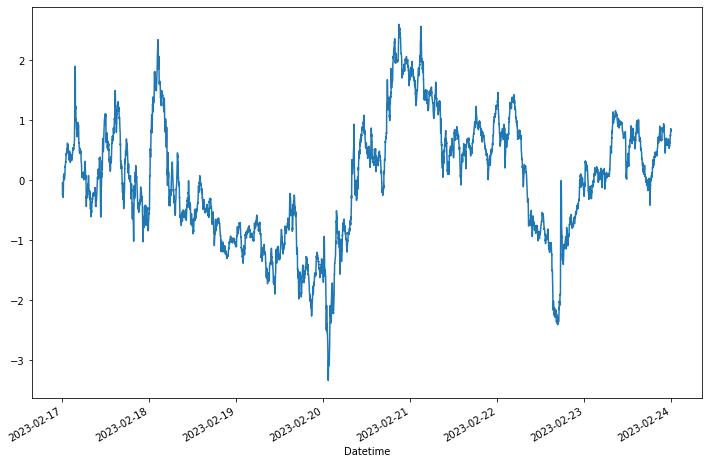

In [380]:
data['z'] = (data.spread - mean)/std
data.z.plot(figsize=(12,8))

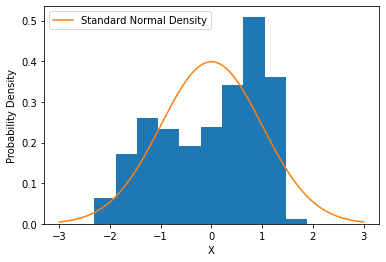

In [352]:
plt.hist(data.z, density=True)

mean = 0
std = 1
x = np.linspace(-3, 3, 1000)
y = 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * (x - mean)**2 / std**2)

plt.plot(x, y, label='Standard Normal Density')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()